# Color of the accretion disk

Previously, we showed how to plot the shape of the accretion disk. However, every line had the same color: white. In actual black holes, the accretion disk has a certain luminosity and color associated to it. In this tutorial, we will cover both.

## Luminosity of the accretion disk

Page and Thorne (1974) calculated the radius-dependent luminosity of a black hole, assuming some simplifying properties of the accretion disk:
- the accretion rate is constant
- the accretion rate is radius-independent

Under these assumptions, you can calculate the intrinsic flux emitted by the accretion disk at some distance R as:



In [ ]:
from luminet.isoradial import Isoradial
import matplotlib.pyplot as plt
import numpy as np

radii = np.linspace(6, 60, 20)
inclination = 1.45
angular_resolution=100

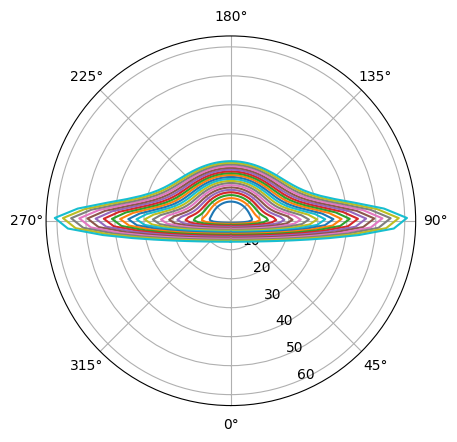

In [34]:
irs = [
    Isoradial(
        radius = R,
        incl=inclination,
        bh_mass = 1,
        angular_resolution=angular_resolution
    )
    for R in radii
]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('S')

for ir in irs:
    ir.plot(ax=ax)

## Ghost image

The image you see above is not the full image. It is only those light rays that have reflected around the top of the black hole. The observer also sees light that is emitted towards the bottom ($\theta > \pi/2$). This is called a higher order image or "ghost image". The $0$th order image is called the "direct image", which is the shape we saw above. We can visualize higher-order isoradial lines easily:

In [35]:
ghost_irs = [
    Isoradial(
        radius = R,
        incl=1.4,
        bh_mass = 1,
        angular_resolution=100,
        order=1    # <----- this keyword argument
    )
    for R in radii
]

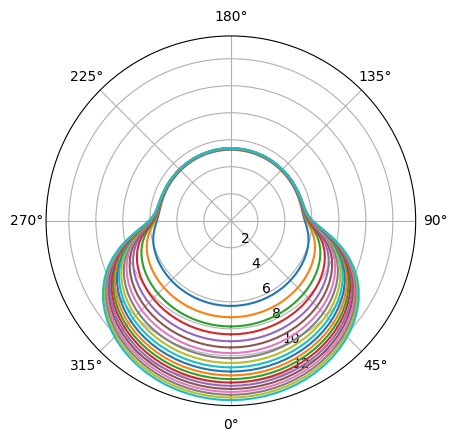

In [36]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('S')

for ir in ghost_irs:
    ir.plot(ax=ax)

Now we can put it all together:

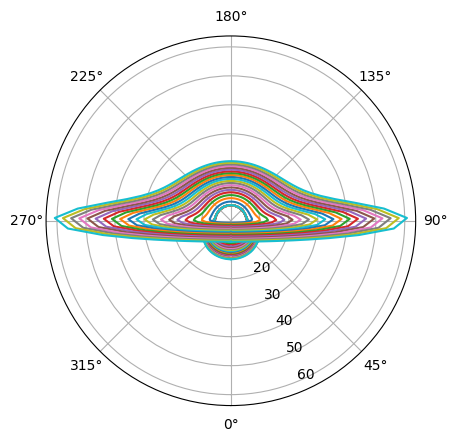

In [47]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('S')

for ir in ghost_irs:
    ir.plot(ax=ax)
for ir in irs:
    ir.plot(ax=ax)

The ghost image is in this case *almost* completely obscured by the direct image. Ghost images are generally only really visible for extreme edge-on cases, or when the direct image has some transparency to it.

To make this look a bit more like an actual black hole, we can adapt the matplotlib settings a bit:

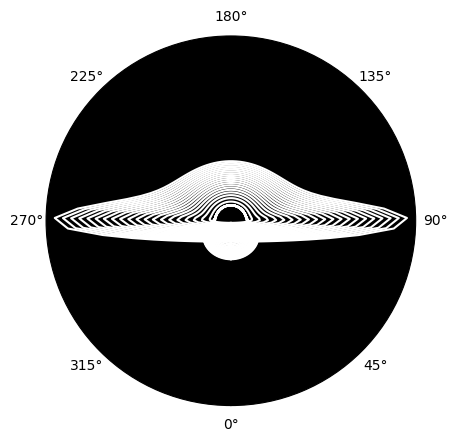

In [41]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('S')

for ir in irs:
    ir.plot(ax=ax, c="white")
for ir in ghost_irs:
    ir.plot(ax=ax, c="white")


ax.set_facecolor("black")
plt.grid(False)

These routines are automated in the `BlackHole` class, which adds some extra aesthetic choices.

<PolarAxes: >

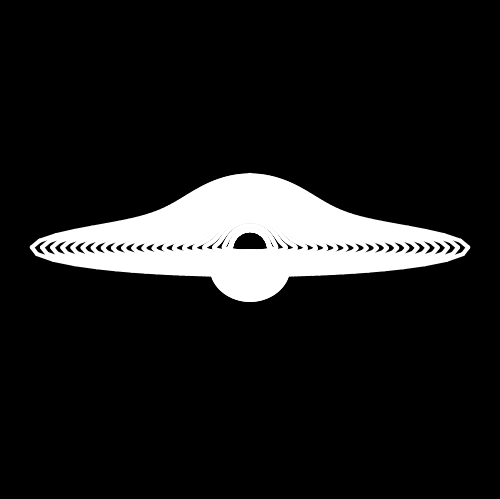

In [46]:
from luminet.black_hole import BlackHole

BlackHole(
    incl=inclination
).plot_isoradials(
    direct_r = radii, 
    ghost_r = radii, 
    color='white'
)